## Toy example for supervised classification

<table>
    <tr>
        <th></th>
        <th>DocID</th>
        <th>Tokens</th>
        <th>E-devices</th>
    </tr>
    <tr>
        <td>Training</td>
        <td>0</td>
        <td>apple ios mac book</td>
        <td>TRUE</td>
    </tr>
    <tr>
        <td>Training</td>
        <td>1</td>
        <td>apple mac book apple store fruit</td>
        <td>TRUE</td>
    </tr>
    <tr>
        <td>Training</td>
        <td>2</td>
        <td>microsoft ibm apple oracle</td>
        <td>TRUE</td>
    </tr>
    <tr>
        <td>Training</td>
        <td>3</td>
        <td>apple banana mango fruit</td>
        <td>FALSE</td>
    </tr>
    <tr>
        <td>Training</td>
        <td>4</td>
        <td>apple fruit</td>
        <td>FALSE</td>
    </tr>
    <tr style='border-top: double 2px #000000'>
        <td style='background-color: #eeee00'>Test</td>
        <td style='background-color: #eeee00'>5</td>
        <td style='background-color: #eeee00'>apple mac book fruit</td>
        <td style='background-color: #eeee00'>?</td>
    </tr>
    <tr>
        <td style='background-color: #eeee00'>Test</td>
        <td style='background-color: #eeee00'>6</td>
        <td style='background-color: #eeee00'>mac fruit color</td>
        <td style='background-color: #eeee00'>?</td>
    </tr>
</table>

In [1]:
train = [
    ['apple', 'ios', 'mac', 'book', 'fruit'],
    ['apple', 'mac', 'book', 'apple', 'fruit'],
    ['microsoft', 'ibm', 'apple', 'oracle'],
    ['apple', 'banana', 'mango', 'fruit'],
    ['apple', 'fruit']
]
test = [
    ['apple', 'mac', 'book', 'fruit'],
    ['mac', 'fruit', 'color']
]

In [2]:
expected = [1, 1, 1, 0, 0]
retrieved = [0, 1, 0, 0, 1]

In [11]:
from sklearn.metrics import confusion_matrix
from mpl_toolkits.axes_grid1 import make_axes_locatable
import itertools
import matplotlib.pyplot as plt
import numpy as np

In [5]:
cm = confusion_matrix(expected, retrieved)
tn, fp, fn, tp = cm.ravel()

In [12]:
def cm_plot(ax, classes, CM, title, figure):
    im = ax.imshow(CM, interpolation='nearest', cmap=plt.cm.Blues)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    figure.colorbar(im, cax=cax, orientation='vertical')
    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_xticklabels(classes, rotation=90, fontsize=12)
    ax.set_yticks(tick_marks)
    ax.set_yticklabels(classes, rotation=0, fontsize=12)
    ax.set_title(title, fontsize=16)
    thresh = CM.max() / 2.
    for i, j in itertools.product(range(CM.shape[0]), range(CM.shape[1])):
        ax.text(j, i, CM[i, j], horizontalalignment="center",
                 color="white" if CM[i, j] > thresh else "black", fontsize=12)
    ax.set_ylabel('True label', fontsize=16)
    ax.set_xlabel('Predicted label', fontsize=16)

[]

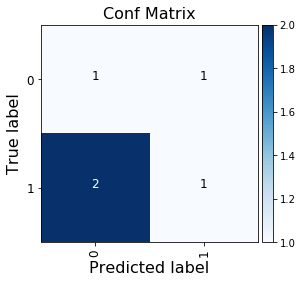

In [13]:
fig, ax = plt.subplots()
cm_plot(ax, [0, 1], cm, 'Conf Matrix', fig)
plt.plot()

In [15]:
dictionary = set()
for doc in train:
    for word in doc:
        dictionary.add(word)
d = list(dictionary)

In [17]:
m = np.zeros((len(train), len(d)))

In [18]:
for i, doc in enumerate(train):
    for w in doc:
        j = d.index(w)
        m[i,j] = 1

In [20]:
import pandas as pd

In [23]:
M = pd.DataFrame(m, columns=d)

In [24]:
M.head()

,ibm,apple,microsoft,banana,mac,oracle,mango,ios,fruit,book
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
2,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [25]:
from sklearn.cluster import KMeans, AgglomerativeClustering

In [26]:
K = KMeans(n_clusters=2)
K.fit(M)
y_pred = K.predict(M)

In [27]:
y_pred

array([0, 0, 1, 0, 0], dtype=int32)

In [28]:
cm = confusion_matrix([1, 1, 1, 0, 0], y_pred)

[]

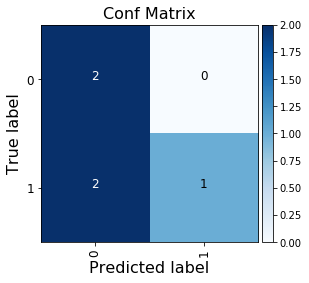

In [29]:
fig, ax = plt.subplots()
cm_plot(ax, [0, 1], cm, 'Conf Matrix', fig)
plt.plot()

## Naive Bayes classifier

In [30]:
M.head()

,ibm,apple,microsoft,banana,mac,oracle,mango,ios,fruit,book
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
2,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [49]:
y_true = [1, 1, 1, 0, 0]

3.0

In [38]:
from collections import defaultdict

In [78]:
class BC(object):
    
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.priors()
        self.likelihood()
        
    def priors(self):
        self.p = defaultdict(lambda: 0)
        for x in self.y:
            self.p[x] += 1
        for k, v in self.p.items():
            self.p[k] = self.p[k] / len(self.y)
            
    def likelihood(self):
        self.l = {}
        for k in self.p.keys():
            rows = [i for i, x in enumerate(self.y) if x == k]
            sub_m = self.X.iloc[rows].sum(axis=0) + np.ones(self.X.shape[1])
            self.l[k] = sub_m
    
    def prob(self, cls, feature):
        return b.l[cls][feature] / b.l[cls].sum()
    
    def predict(self, words):
        for k in self.p.keys():
            prior = self.p[k]
            x = 1
            for word in words:
                x *= self.prob(k, word)
            print(k, prior * x)

In [79]:
b = BC(M, y_true)

In [81]:
b.predict(['mango', 'banana'])

1 0.0011342155009451795
0 0.00625
